In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby("Дата")["Количество"].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [8]:
print(grouped_df.head(10))

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055
5 2018-01-10        3653
6 2018-01-11        3176
7 2018-01-12        3092
8 2018-01-13        3294
9 2018-01-14        3228


Нарисуйте график продаж у `grouped_df`

DatetimeIndex(['2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14',
               ...
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', name='Дата', length=205, freq=None)


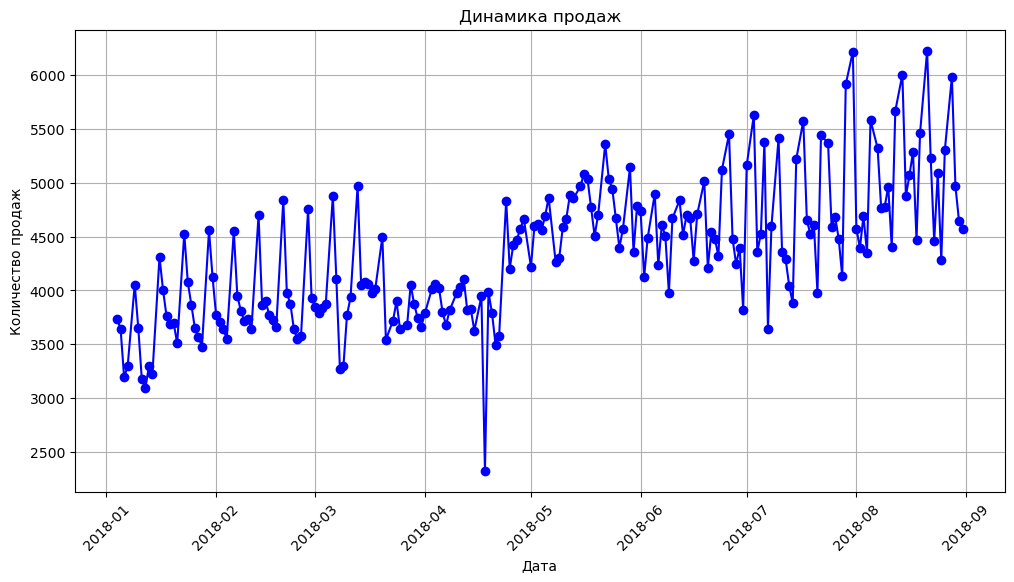

In [9]:
# Убеждаемся, что индекс - это datetime
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"])
grouped_df.set_index("Дата", inplace=True)

# Проверяем, корректно ли отображается индекс
print(grouped_df.index)

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df["Количество"], marker="o", linestyle="-", color="b")

# Настраиваем подписи
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.title("Динамика продаж")

# Корректируем ось X
plt.xticks(rotation=45)
plt.grid()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

График показывает динамику количества продаж по датам. В начале графика (первая часть дат) фиксируются резкие скачки продаж – от низких значений до пиковых. Самый высокий пик достигает почти 1800 единиц, а минимальные значения опускаются ниже 1200 единиц. Продажи не стабильны, видны регулярные резкие изменения вверх и вниз. Можно заметить, что после определенного момента (примерно середина графика) продажи начинают постепенно увеличиваться. В последней части графика продажи чаще достигают высоких значений по сравнению с началом.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_row = df[df["Количество"] == df["Количество"].max()]
print(max_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
# Убедимся, что "Дата" в формате datetime
df["Дата"] = pd.to_datetime(df["Дата"], format="%Y-%m-%d")

# Фильтруем только летние месяцы (июнь, июль, август) и среды
df_filtered = df[
    (df["Дата"].dt.month.isin([6, 7, 8])) &  # Летние месяцы
    (df["Дата"].dt.weekday == 2) &  # Среда (0 - понедельник, 2 - среда)
    (df["Склад"] == 3)  # Склад №3
]

# Группируем по номенклатуре и суммируем продажи
top_product = df_filtered.groupby("Номенклатура")["Количество"].sum()

# Находим товар с максимальными продажами
top_product = top_product.idxmax()
print("Топовый товар по средам за летние месяцы на складе №3:", top_product)

Топовый товар по средам за летние месяцы на складе №3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

не могу выполнить данное задание, т.к. не совсем пониаю, что означает "скачайте исходные данные".